# RecSys Twitter - Final Project

### Authors: Quimi, Ricard, Pere

-------------------------------------------------------------------------------------------------------------------------------


This project will be the result...

El projecte està divit en les següents parts:
    - asdkoam
    - askldmaskd
    - asdklmasd
    - ...

1.Obtenció del dataset

2.Partició de variables en les tres seccions

3.Explicació de les variables

-------------------------------------------------------------------------------------------------------------------------------

### Data Import

asdasdsadkoa sdoas ....

In [1]:
# Import needed packages
import os
import pandas as pd
import matplotlib

In [2]:
# set path
#libname = 'C:/Users/usuario/Documents/Data Science/Postgrau-master/Final Project'

# load data
#df = pd.read_csv('twitter_subset1M.csv')
df = pd.read_csv('tocho2.csv')

# Visualize some data
df.head()

,Unnamed: 0,text_ tokens,hashtags,tweet_id,present_media,present_links,present_domains,tweet_type,language,tweet_timestamp,...,engaging_user_id,engaging_user_follower_count,engaging_user_following_count,engaging_user_is_verified,engaging_user_account_creation,engagee_follows_engager,reply_timestamp,retweet_timestamp,retweet_with_comment_timestamp,like_timestamp
0,0,101\t16493\t12478\t117\t10105\t42370\t76299\t1...,NaN,39024FBE0136E046D1357196BAECFCA6,GIF,NaN,NaN,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581532200,...,000006829BEADA9EEA695CF0C334B426,2,29,False,1568107028,False,NaN,NaN,NaN,NaN
1,1,101\t56898\t137\t12026\t10216\t39639\t10161\t1...,NaN,885EECCFE319306E00FFFFAC9016DCAC,NaN,NaN,NaN,Retweet,06D61DCBBE938971E1EA0C38BD9B5446,1581460521,...,00003E6CE47A2F6992901FA83F253C68,1148,1038,False,1266187322,False,NaN,NaN,NaN,NaN
2,2,101\t14924\t16118\t10114\t12888\t15127\t31204\...,3653868A966576CF17D6A9064889BCED\t7A6710E791A1...,AB3ADBBD011F88D10FE7F6C5FDAB214C,Photo,NaN,NaN,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581087590,...,000269A50293CC2B1E9C72B287FA624E,515,424,False,1254588643,True,NaN,NaN,NaN,1.581090e+09
3,3,101\t138\t19826\t10108\t10105\t10635\t10105\t1...,NaN,675D7920EA2FB4869BA767F5122FB115,NaN,NaN,NaN,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581134845,...,0004C10C480EF88F3EED5822149DC93F,4,125,False,1547955941,False,NaN,NaN,NaN,1.581135e+09
4,4,101\t73714\t117\t11858\t10730\t12603\t11387\t4...,NaN,9D81B887F9DCA4C481762720A980F372,NaN,NaN,NaN,Quote,2996EB2FE8162C076D070A4C8D6532CD,1581384474,...,0007B114B09D17838F76C88A51374017,34,172,False,1561164616,False,NaN,NaN,NaN,NaN


-------------------------------------------------------------------------------------------------------------------------------

### Data Preparation

asdadsadasdaskldmasklda....

In [3]:
# Rename 'text_tokens' column name
df.rename(columns={'text_ tokens':'text_tokens'}, inplace=True)

# Select tweets in English
df = df[df.language=='D3164C7FBCF2565DDF915B1B3AEFB1DC']

# Clean tokens and transform into lists
df['text_tokens'] = df['text_tokens'].str.split('\t')

# Remove first column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Remove id variables
df.drop(['tweet_id', 'engaged_with_user_id', 'engaging_user_id'], axis=1, inplace=True)

# Add engagement timestamp and remove timestamp columns
df['engagement_timestamp'] = df[['reply_timestamp','retweet_with_comment_timestamp','like_timestamp']].min(axis=1)

# Remove unused variables
df.drop(['present_domains', 'language'], axis=1, inplace=True)

# Upload index
df.reset_index(drop=True, inplace=True)

-------------------------------------------------------------------------------------------------------------------------------

### Data Preprocessing

asdasdasas.....

In [4]:
# Evaluate the existence of a question mark in the tweet
df['question'] = df['text_tokens'].apply(lambda x: '136' in x)

# Transform variable 'hashtags' to boolean one-hot encoded
df['present_hashtags'] = df['hashtags'].apply(lambda x: 1 if not pd.isnull(x) else 0)
df.drop('hashtags', axis=1, inplace=True)

# Transform variable 'present_links' to boolean one-hot encoded
df['present_links'] = df['present_links'].apply(lambda x: 1 if not pd.isnull(x) else 0)

# Transform variable 'present_media' into 3 new variables one-hot encoded
def hot_encod_photo(x):
    try:
        return x.count('Photo')
    except AttributeError:
        return 0
def hot_encod_video(x):
    try:
        return x.count('Video')
    except AttributeError:
        return 0
def hot_encod_gif(x):
    try:
        return x.count('GIF')
    except AttributeError:
        return 0
    
df['present_photo'] = df['present_media'].apply(hot_encod_photo)
df['present_video'] = df['present_media'].apply(hot_encod_video)
df['present_gif'] = df['present_media'].apply(hot_encod_gif)

df.drop(['present_media'], axis=1, inplace=True)

# Transform boolean variables to one-hot encoded
df["engaged_with_user_is_verified"] = df["engaged_with_user_is_verified"].astype(int)
df["engaging_user_is_verified"] = df["engaging_user_is_verified"].astype(int)
df["engagee_follows_engager"] = df["engagee_follows_engager"].astype(int)

# Transform timestamp variables to readable dates
df['tweet_timestamp'] = pd.to_datetime(df['tweet_timestamp'], unit='s')
df['tweet_timestamp_weekday'] = df['tweet_timestamp'].dt.weekday 
df['engagement_timestamp'] = pd.to_datetime(df['engagement_timestamp'], unit='s')
df['engaged_with_user_account_creation'] = pd.to_datetime(df['engaged_with_user_account_creation'], unit='s')
df['engaging_user_account_creation'] = pd.to_datetime(df['engaging_user_account_creation'], unit='s')

# Transform 'tweet_type' variable to one-hot encoded
dummies_tweet_type = pd.get_dummies(df['tweet_type'], prefix='tweet_type')
df = pd.concat([df, dummies_tweet_type], axis=1)
df.drop(['tweet_type'], axis=1, inplace=True)

# Create new variables 'reaction_time' and 'present_reaction'
df['reaction_time'] = df['engagement_timestamp'] - df['tweet_timestamp']
df['reaction_time_seconds'] = df['reaction_time'].dt.seconds
df['present_reaction'] = df['reaction_time'].apply(lambda x: 1 if not pd.isnull(x) else 0)

# Create a variable with the reaction type in a hot encoding style, and drop separate timestamp columns
df['reaction_type_reply'] = df['reply_timestamp'].apply(lambda x: 1 if not pd.isnull(x) else 0)
df['reaction_type_retweet'] = df['retweet_timestamp'].apply(lambda x: 1 if not pd.isnull(x) else 0)
df['reaction_type_retweet_comment'] = df['retweet_with_comment_timestamp'].apply(lambda x: 1 if not pd.isnull(x) else 0)
df['reaction_type_like'] = df['like_timestamp'].apply(lambda x: 1 if not pd.isnull(x) else 0)
df.drop(['reply_timestamp', 'retweet_timestamp', 'retweet_with_comment_timestamp', 'like_timestamp'], axis=1, inplace=True)

# Evaluate popularity of tweet engaged user (popularity of user who engages with no so important)
max_followers = df['engaged_with_user_follower_count'].max()
min_followers = df['engaged_with_user_follower_count'].min()

df['engaged_with_popularity'] = df['engaged_with_user_follower_count'].apply(lambda x: (x-min_followers)/max_followers)
df['engaged_with_popularity_categorial'] = df['engaged_with_popularity'].apply(lambda x: 1 if x>0.10 else 0)

# Ratio followers/following
df['engaged_followers_ratio']=df['engaged_with_user_follower_count']/df['engaged_with_user_following_count']
df['engaging_followers_ratio']=df['engaging_user_follower_count']/df['engaging_user_following_count']

# Evaluate how old is the engaged with user account
df['engaged_with_account_seniority']=(pd.to_datetime("today")-df['engaged_with_user_account_creation']).dt.days

In [5]:
df.head()

,text_tokens,present_links,tweet_timestamp,engaged_with_user_follower_count,engaged_with_user_following_count,engaged_with_user_is_verified,engaged_with_user_account_creation,engaging_user_follower_count,engaging_user_following_count,engaging_user_is_verified,...,present_reaction,reaction_type_reply,reaction_type_retweet,reaction_type_retweet_comment,reaction_type_like,engaged_with_popularity,engaged_with_popularity_categorial,engaged_followers_ratio,engaging_followers_ratio,engaged_with_account_seniority
0,"[101, 16493, 12478, 117, 10105, 42370, 76299, ...",0,2020-02-12 18:30:00,1344732,125,1,2018-09-18 01:15:59,2,29,0,...,0,0,0,0,0,0.011923,0,10757.856000,0.068966,718
1,"[101, 14924, 16118, 10114, 12888, 15127, 31204...",0,2020-02-07 14:59:50,298,1296,0,2009-05-28 19:10:09,515,424,0,...,1,0,0,0,1,0.000003,0,0.229938,1.214623,4117
2,"[101, 138, 19826, 10108, 10105, 10635, 10105, ...",0,2020-02-08 04:07:25,1215914,7054,1,2013-11-16 21:31:03,4,125,0,...,1,0,0,0,1,0.010781,0,172.372271,0.032000,2484
3,"[101, 56898, 137, 42374, 36630, 10797, 90861, ...",0,2020-02-06 17:51:57,35765,22045,0,2015-08-15 00:37:19,33439,35598,0,...,0,0,1,0,0,0.000317,0,1.622363,0.939351,1848
4,"[101, 137, 87043, 10679, 11369, 11211, 22650, ...",0,2020-02-07 01:09:42,23335,9210,0,2016-12-15 06:33:22,27980,25991,0,...,1,0,0,0,1,0.000207,0,2.533659,1.076526,1360


-------------------------------------------------------------------------------------------------------------------------------

### Data Analysis

-------------------------------------------------------------------------------------------------------------------------------

### Recommender

Basic

/home/ricard/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


               precision    recall  f1-score   support

no engagement       0.59      0.81      0.68     31439
   engagement       0.58      0.32      0.41     25862

     accuracy                           0.59     57301
    macro avg       0.59      0.57      0.55     57301
 weighted avg       0.59      0.59      0.56     57301



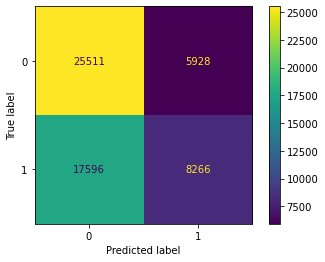

In [6]:
import xgboost as xgb

features = ['engaged_with_user_is_verified', 'engagee_follows_engager', 'present_photo', 'present_video', 'present_gif', 'present_links', 'present_hashtags', 'engaged_with_popularity_categorial', 'engaged_with_account_seniority']
target = ['reaction_type_like']

train = df[df['tweet_timestamp_weekday']<5]
test = df[df['tweet_timestamp_weekday']>4]
X_train=train[features]
y_train=train[target]
X_test=test[features]
y_test=test[target]

xg_rec = xgb.XGBClassifier()
xg_rec.fit(X_train,y_train)
preds = xg_rec.predict(X_test)

from sklearn.metrics import classification_report, plot_confusion_matrix
target_names = ['no engagement', 'engagement']
print(classification_report(y_test, preds, target_names=target_names))
plot_confusion_matrix(xg_rec, X_test, y_test) 


Provant varis hiperparametres

/home/ricard/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


               precision    recall  f1-score   support

no engagement       0.59      0.81      0.68     31439
   engagement       0.58      0.32      0.41     25862

     accuracy                           0.59     57301
    macro avg       0.59      0.57      0.55     57301
 weighted avg       0.59      0.59      0.56     57301



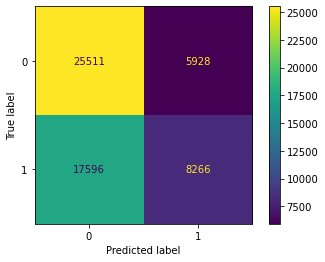

In [7]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'n_estimators':.3,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'binary:logistic',
    'n_estimators':2,
    'eval_metric':'logloss',
    'verbose':True
}

xg_rec = xgb.XGBClassifier()
xg_rec.fit(X_train,y_train)
preds = xg_rec.predict(X_test)

from sklearn.metrics import classification_report, plot_confusion_matrix
target_names = ['no engagement', 'engagement']
print(classification_report(y_test, preds, target_names=target_names))
plot_confusion_matrix(xg_rec, X_test, y_test) 

Mirar feature importance

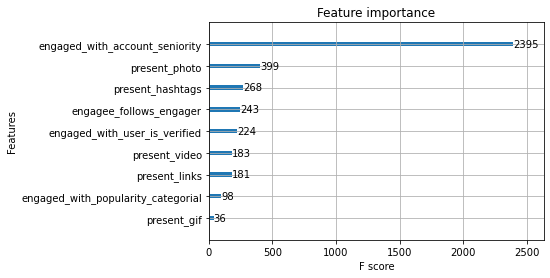

In [8]:
from matplotlib import pyplot

xgb.plot_importance(xg_rec)
pyplot.show()

In [9]:
features = ['engaged_with_user_is_verified', 'engagee_follows_engager', 'present_photo', 'present_video', 'present_gif','present_links','engaged_with_popularity_categorial']
